## Kernel estimation testing

In [1]:
# User
user = "nk1922"

# Imports
import torch
from torch import nn
from torch.distributions import Normal,Laplace,Uniform
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

os.chdir('C:/Users/{0}/OneDrive/Documents/Cocycles project/Cocycle_code'.format(user))
from Regression_functionals import *
from Distribution_estimation import *
from Kernels import *
os.chdir('C:/Users/{0}/OneDrive/Documents/Cocycles project/Experimental_results'.format(user))

In [2]:
# Data generation
N = 250
sd = 0.25
X = Normal(0,1).sample((N,1))
Y = torch.sin(X) + Normal(0,sd).sample((N,1))

KRR_regressor = KRR_functional(gaussian_kernel(lengthscale = torch.ones(len(X.T),
                                                                    requires_grad = True)))
NW_regressor = NW_functional(gaussian_kernel(lengthscale = torch.ones(len(X.T),
                                                                    requires_grad = True)))
LL_regressor = LL_functional(gaussian_kernel(lengthscale = torch.ones(len(X.T),
                                                                    requires_grad = True)))
CE_KRR = Conditional_Expectation_Regressor(KRR_regressor)
CE_NW = Conditional_Expectation_Regressor(NW_regressor)
CE_LL = Conditional_Expectation_Regressor(LL_regressor)

KRR_done
NW_done
LL_done


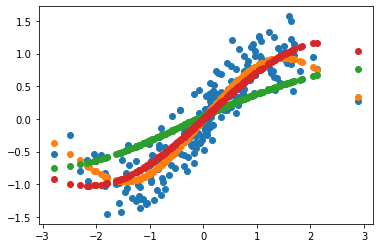

iter 0 , loss =  tensor(0.0696)
iter 10 , loss =  tensor(0.0695)
iter 20 , loss =  tensor(0.0695)
iter 30 , loss =  tensor(0.0695)
iter 40 , loss =  tensor(0.0694)
iter 50 , loss =  tensor(0.0694)
iter 60 , loss =  tensor(0.0694)
iter 70 , loss =  tensor(0.0694)
iter 80 , loss =  tensor(0.0694)
iter 90 , loss =  tensor(0.0694)
iter 100 , loss =  tensor(0.0694)
iter 0 , loss =  tensor(0.1854)
iter 10 , loss =  tensor(0.1638)
iter 20 , loss =  tensor(0.1429)
iter 30 , loss =  tensor(0.1237)
iter 40 , loss =  tensor(0.1072)
iter 50 , loss =  tensor(0.0944)
iter 60 , loss =  tensor(0.0855)
iter 70 , loss =  tensor(0.0800)
iter 80 , loss =  tensor(0.0769)
iter 90 , loss =  tensor(0.0753)
iter 100 , loss =  tensor(0.0744)
iter 110 , loss =  tensor(0.0738)
iter 120 , loss =  tensor(0.0734)
iter 130 , loss =  tensor(0.0731)
iter 140 , loss =  tensor(0.0728)
iter 150 , loss =  tensor(0.0725)
iter 160 , loss =  tensor(0.0724)
iter 170 , loss =  tensor(0.0723)
iter 180 , loss =  tensor(0.0723)
it

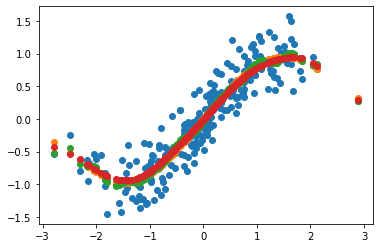

In [3]:
lr = 0.01

plt.scatter(X.T,Y.T)
plt.scatter(X.T,CE_KRR.forward(Y,X,X).T.detach())
print("KRR_done")
plt.scatter(X.T,CE_NW.forward(Y,X,X).T.detach())
print("NW_done")
plt.scatter(X.T,CE_LL.forward(Y,X,X).T.detach())
print("LL_done")
plt.show()

losses = CE_KRR.optimise(X,Y,learn_rate = lr)
losses = CE_NW.optimise(X,Y,learn_rate = lr)
losses = CE_LL.optimise(X,Y,learn_rate = lr)

plt.scatter(X.T,Y.T)
plt.scatter(X.T,CE_KRR.forward(Y,X,X).T.detach())
print("KRR_done")
plt.scatter(X.T,CE_NW.forward(Y,X,X).T.detach())
print("NW_done")
plt.scatter(X.T,CE_LL.forward(Y,X,X).T.detach())
print("LL_done")

KRR_done
NW_done
LL_done


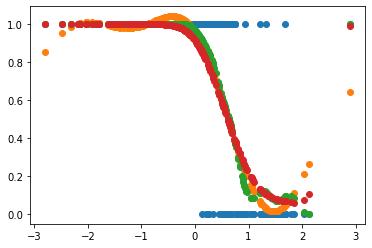

iter 0 , loss =  tensor(0.0747)
iter 10 , loss =  tensor(0.0742)
iter 20 , loss =  tensor(0.0738)
iter 30 , loss =  tensor(0.0734)
iter 40 , loss =  tensor(0.0731)
iter 50 , loss =  tensor(0.0729)
iter 60 , loss =  tensor(0.0728)
iter 70 , loss =  tensor(0.0728)
iter 80 , loss =  tensor(0.0728)
iter 90 , loss =  tensor(0.0728)
iter 100 , loss =  tensor(0.0728)
iter 110 , loss =  tensor(0.0728)
iter 120 , loss =  tensor(0.0728)
iter 130 , loss =  tensor(0.0728)
iter 140 , loss =  tensor(0.0728)
iter 150 , loss =  tensor(0.0728)
iter 0 , loss =  tensor(0.0753)
iter 10 , loss =  tensor(0.0750)
iter 20 , loss =  tensor(0.0749)
iter 30 , loss =  tensor(0.0749)
iter 40 , loss =  tensor(0.0749)
iter 50 , loss =  tensor(0.0749)
iter 60 , loss =  tensor(0.0749)
iter 70 , loss =  tensor(0.0749)
iter 80 , loss =  tensor(0.0749)
iter 90 , loss =  tensor(0.0749)
iter 100 , loss =  tensor(0.0749)
iter 0 , loss =  tensor(0.0778)
iter 10 , loss =  tensor(0.0758)
iter 20 , loss =  tensor(0.0751)
iter 3

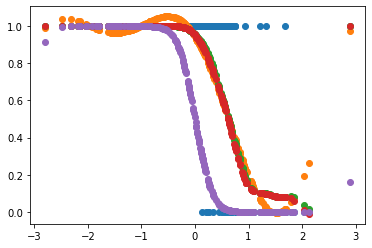

In [4]:
t=0.5
lr = 0.01

Z = (Y<t).float()
plt.scatter(X.T,Z.T)
plt.scatter(X.T,CE_KRR.forward(Z,X,X).T.detach())
print("KRR_done")
plt.scatter(X.T,CE_NW.forward(Z,X,X).T.detach())
print("NW_done")
plt.scatter(X.T,CE_LL.forward(Z,X,X).T.detach())
print("LL_done")
plt.show()

losses = CE_KRR.optimise(X,Z,learn_rate = lr)
losses = CE_NW.optimise(X,Z,learn_rate = lr)
losses = CE_LL.optimise(X,Z,learn_rate = lr)

plt.scatter(X.T,Z.T)
plt.scatter(X.T,CE_KRR.forward(Z,X,X).T.detach())
print("KRR_done")
plt.scatter(X.T,CE_NW.forward(Z,X,X).T.detach())
print("NW_done")
plt.scatter(X.T,CE_LL.forward(Z,X,X).T.detach())
print("LL_done")
plt.scatter(X.T,Normal(torch.sin(X),sd).cdf(torch.zeros(1)))

In [19]:
CE_KRR.get_weights(X,Y)

In [13]:
CE_KRR.features

<function Regression_functionals.KRR_functional.get_features.<locals>.feature(self, Xtest)>